In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#copying csv file in google colab instance 
!cp /mydrive/zomato/cs_data_2.csv /content/

In [ ]:
!pip install flask pandas plotly gunicorn dash dash-daq

     |████████████████████████████████| 81kB 2.1MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 645kB 10.7MB/s 
     |████████████████████████████████| 1.0MB 18.3MB/s 
     |████████████████████████████████| 3.5MB 26.2MB/s 
     |████████████████████████████████| 194kB 38.9MB/s 
     |████████████████████████████████| 1.8MB 43.6MB/s 
     |████████████████████████████████| 358kB 37.3MB/s 
  Created wheel for dash: filename=dash-1.17.0-cp36-none-any.whl size=83728 sha256=ba6a87c0a0f5dff22d540cf83f8d375ea1b85ae37339243f4b7610db8468b10c
  Stored in directory: /root/.cache/pip/wheels/e0/32/13/8a569b638a79cf80a4a721f56040d91198adec28e3bc8123fc
  Created wheel for dash-daq: filename=dash_daq-0.5.0-cp36-none-any.whl size=669704 sha256=cb514fa1fed614365fcef4e7bbf90031f87441531e74302c024e8574f821c078
  Stored in directory: /root/.cache/pip/wheels/1c/9c/f7/84731716eaa9fc952cdbdd1f87df3ca9b8805c317c609efcd6
  Created wheel for flask-compress: fi

# Business Problem/ Challenge / Objectives

At Zomato, our mission is to provide better food for more people. With that as our guiding light, we strive
to deliver a great customer experience where quality food is delivered within the promised time.

Another important aspect of the environment that we operate in is to build a sustainable business model
i.e. having a balanced cost structure.


One of the ways that we try to manage costs is by doing due diligence to batch orders such that it not only
helps to reduce costs but also minimizes the effect on customer experience i.e. delay in food delivery.



**Problem**:
> Determine the share of successfully delivered orders that can be
batched for Bangalore . ​

In a nutshell, business objective can be defined as below image.

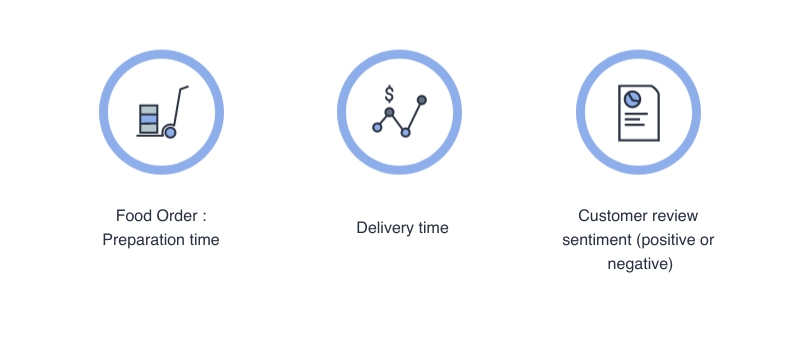

In above chart: Preparation of food gonna take it's time. We cannot compromise on quality food. And customer review will be positive only if we deliver within promised timeframe. So, we can captialize this factor to push the horizon of improvement. For example: If we deliver items nicely and customer review is positive. It will build company reputation gradually. But let's say, if review is negative then it will spread like a fire in the wild. So, in this competitive market, It's not enough to be good enough. But important to be top notch with your strategies and decisions.  

# Verifying my understanding

### Terminologies 

- Due diligence: Research and analysis of a company or organization done in preparation for a business transaction (such as a corporate merger or purchase of securities)
- Batch orders: Batched orders are those that are picked together by a rider from the same restaurant so as to deliver
more than 1 order in a trip.
- ​Breach: Infraction or violation of a law, obligation, tie, or standard.

### Constrains:
1. Each rider at any given time can carry a maximum of 2 orders and a new order can only be
assigned when all the previously picked up orders have been delivered.
2. A rider travels at a constant speed of 15 Km/hr.
3. For computing distance, use aerial distance between two points.
4. Only ​ consider orders that are fulfilled by Zomato
5. When Orders O1 and O2 are batched, then O1 has to be delivered first, if O1 was created before
O2 and vice versa.  ​

# Research and Analysis


In the pursuit of solving this question. I attempted 2 hypothesis in this case study. Explaining my thought process behind them and why i dejected some hypothesis or why one is better over other. Finally, only one hypothesis would be key to solve the problem. 

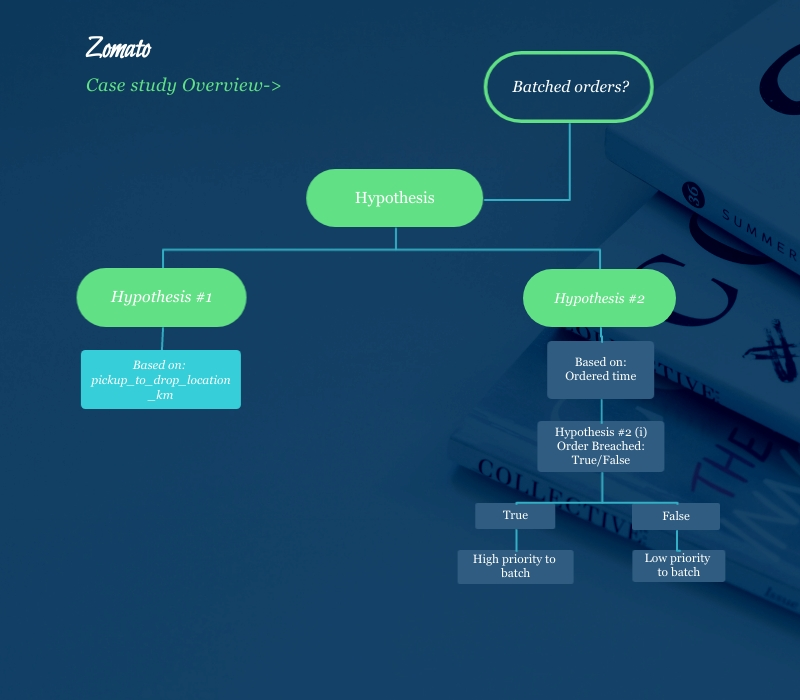

## Hypothesis #1

> I **hypothesize** that we can use `pickup_to_drop_location_km` column which basically says the distance rider has to travel less from restaurant to delivery point. We can use this as a factor to make batch orders so that rider has to travel some place and deliver.

```
food_order_id  food_restaurant_id  pickup_to_drop_location_km created_at 	pickup_latitude 	pickup_longitude 	drop_latitude 	drop_longitude 	 expected_delivery_time 	actual_delivery_time 	breached 	food_item_quantity
0 	29004366590 	5401247 	0.321 	2020-02-01 19:34:20.000 	2.969087 	92.647691 	2.967667 	92.650129 	30.0 	21.544 	False 	2
1 	29005289677 	5712146 	5.351 	2020-02-01 08:16:28.000 	2.935062 	92.613296 	2.908375 	92.637859 	33.0 	32.554 	False 	2
2 	29006049722 	4878866 	2.740 	2020-02-01 08:53:59.000 	2.998270 	92.569455 	3.009712 	92.554168 	26.0 	21.440 	False 	1
3 	29014686971 	4713140 	2.784 	2020-02-01 21:02:25.000 	2.976243 	92.598372 	2.964131 	92.612441 	33.0 	25.006 	False 	1

```



If we batch order on the basis of `pickup_to_drop_location_km`. Means for the same pickup_to_drop distance. Rider will batch the order and deliver. But this somehow looks rather unefficient. Why? 
- Seeing row  number 2nd and 3rd in above table pickup to drop distance is nearly around 2.7km but the order was registered at different times. 
- Like one order was registered at `08:53:59` and other `21:02:25`. There is huge time gap.  We cannot possibly batch them.

We can propose another branch of this hypothesis: 

Incase, let's say we have almost same order time. 
- Can we then use `pickup_to_drop_location_km` to batch the orders?
Let's see if we can figure this out, One thing i propose that we cannot make it Thumb rule. 
- Same pickup_to_drop distance doesn't mean that they have to be in same direction. 
- For example: 10km same delivery distance. One delivery distance could be in north and Other delivery distance could be in south. Another modified version of this hypothesis we will discuss later.

And That's why this hypothesis comes to an end.


## Data wrangling & execution part:

In this section, we are only adding new features to the dataset that might help us in our road to solution.

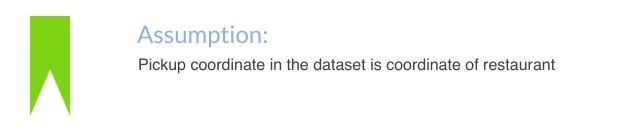

In [4]:
#importing necessary module
import pandas as pd

In [5]:
#loading csv file
df= pd.read_csv('cs_data_2.csv')

In [6]:
#just to see several 5 rows
df.head()

food_order_id  food_restaurant_id  ...  food_item_quantity  food_item_unit_cost
0    33795289376          1765924634  ...                   1                 60.0
1    33795289376          1765924634  ...                   1                 60.0
2    33795289376          1765924634  ...                   1                 60.0
3    42653639361          1765953743  ...                   1                 49.0
4    61878376085          1765953743  ...                   8                 25.0

[5 rows x 16 columns]

In [7]:
#seeing random 10 rows to get an idea
df.sample(10)

food_order_id  ...  food_item_unit_cost
300342    58020352997  ...               400.00
298310    62286638266  ...                10.00
517204    34064453895  ...                79.00
441299    30854003624  ...               200.96
355956    38562515427  ...                99.00
361709    52902028478  ...               429.00
191927    45411472661  ...               279.00
382496    59942735794  ...               130.00
171823    53593821894  ...               140.00
1197      56519344452  ...                17.00

[10 rows x 16 columns]

As suggested by the problem. There are 3 constrains we are supposed to use: 
- Using only Bangalore dataset.
- Considering deliveries fulfilled by zomato
- Considering the successfully delivered cases. 

In [8]:
#filtering the dataset
df= df[(df['city_name']=='Bengaluru') & (df['driver_type']==15) & (df['order_status']==6)]

Now, we have desired filtered dataset. And let's have a look.

In [9]:
df.head()

food_order_id  food_restaurant_id  ...  food_item_quantity  food_item_unit_cost
17    53849642430          1766072690  ...                   1                449.0
18    53849642430          1766072690  ...                   1                379.0
19    53849642430          1766072690  ...                   1                389.0
20    55588091162          1766072690  ...                   1                259.0
21    55839822095          1766072690  ...                   1                209.0

[5 rows x 16 columns]

### Adding Actual delivery time column to the dataset:
We can calculate delivery time using simple `t=d/v`. Where d is distance between pickup & drop. v is constand speed 15km/hr as provided in dataset. 
- After that, we can find Actual delivery time as `Delivered_at - Created_at` as provided in case study pdf. This actual delivery time  involves food preparation time and pickup to drop location time . But after calculating time using `t=d/v`. This time will be delivered time. Time which rider takes to deliver food from pickup location to drop location.

> NOTE: In real life, customer and rider both will be affected by the food preparation time. So, it's important to consider food preparation time. To do that we will simply add calculated time with predicted food time(as provided by the dataset).

After, we have actual time as hypothesized above. We can calculate if `breach` of order by simply making sure that calculated delivery time is less than `expected_delivery_time`. Mathematically, (actual delivery time -  expected_delivery_time) < 0. Then breach happens. 

Calculating time taken between pickup and drop point using `t=d/v`. Since, speed is in km/hr. And in order to find time in minutes we need to multiply with 60.

In [10]:
#in mins
df.pickup_to_drop_location_km*60/15  

17        15.804
18        15.804
19        15.804
20        11.988
21         1.636
           ...  
595722    11.416
595723     2.080
595724     2.080
595725     2.080
595726    15.500
Name: pickup_to_drop_location_km, Length: 221613, dtype: float64

Actual delivery time would be time taken to prepare food and to deliver the same. That's why we are adding below.

In [13]:
df.pickup_to_drop_location_km*60/15  + df.predicted_food_prep_time

17        35.284
18        35.284
19        35.284
20        25.268
21        12.886
           ...  
595722    19.406
595723    13.760
595724    13.760
595725    13.760
595726    29.530
Length: 221613, dtype: float64

In [11]:
#making new column of actual delivery time
actual_delivery_time=df.pickup_to_drop_location_km*60/15  + df.predicted_food_prep_time
df.insert(loc=11, column='actual_delivery_time', value=actual_delivery_time)

In [12]:
df.head()

food_order_id  food_restaurant_id  ...  food_item_quantity  food_item_unit_cost
17    53849642430          1766072690  ...                   1                449.0
18    53849642430          1766072690  ...                   1                379.0
19    53849642430          1766072690  ...                   1                389.0
20    55588091162          1766072690  ...                   1                259.0
21    55839822095          1766072690  ...                   1                209.0

[5 rows x 17 columns]

### Adding breach column in the dataset

Calcuating the breach simply by (actual delivery time - expected_delivery_time) < 0. Note that the value less than 0 would be an indication that delivery been breached. Rather than representing it in positive/negative form. We are using, True or False boolean form. Just to be more clear interms of how we design data. 

In [14]:
breach= (df.expected_delivery_time-df.actual_delivery_time)<0 # this will give us boolean form

- False represents delivery was not breached.
- True represents delivery was breached. 


In [44]:
breach.sample(10)  

325410    False
396930    False
433052    False
16826     False
144717     True
40530     False
571539    False
87814     False
386954    False
118410    False
dtype: bool

 Adding new column named 'breached'. Which will tell us if delivery was breached or not.

In [15]:
df.insert(loc=13, column='breached', value=breach)

In [16]:
df.head() #altered dataset with new column

food_order_id  food_restaurant_id  ...  food_item_quantity  food_item_unit_cost
17    53849642430          1766072690  ...                   1                449.0
18    53849642430          1766072690  ...                   1                379.0
19    53849642430          1766072690  ...                   1                389.0
20    55588091162          1766072690  ...                   1                259.0
21    55839822095          1766072690  ...                   1                209.0

[5 rows x 18 columns]

### Grouping the same order

Before proceeding with another hypothesis. When we look at data we understand that, for every item in an order. New row is created separately. For example:
```
food_order_id  food_restaurant_id pickup_latitude pickup_longitude city_name drop_latitude drop_longitude created_at pickup_to_drop_location_km expected_delivery_time predicted_food_prep_time actual_delivery_time driver_type breached order_status food_item_name food_item_quantity food_item_unit_cost
17 	53849642430 	1766072690 	3.042535 	92.623123 	Bengaluru 	3.057000 	92.627000 	2020-02-01 20:27:25.000 	3.951 	36.0 	19.48 	35.284 	15 	False 	6 	Guntur Chicken Fry 	1 	449.0
18 	53849642430 	1766072690 	3.042535 	92.623123 	Bengaluru 	3.057000 	92.627000 	2020-02-01 20:27:25.000 	3.951 	36.0 	19.48 	35.284 	15 	False 	6 	Boneless Chicken Biryani 	1 	379.0
19 	53849642430 	1766072690 	3.042535 	92.623123 	Bengaluru 	3.057000 	92.627000 	2020-02-01 20:27:25.000 	3.951 	36.0 	19.48 	35.284 	15 	False 	6 	Chicken 65 	1 	389.0	
``` 

As you can see, first three rows were ordered from same drop_latitude and longitude. And Most importantly, registered at same time at merchant `created_at`. Actually, they are single order and in different rows due to different food items were ordered.

So, we need to manipulate dataset. Such that, single row have single order. It will be better structure of dataset.

In [17]:
#grouping the order
df_filt= df.groupby(['food_order_id','food_restaurant_id','pickup_to_drop_location_km','created_at',
                     'pickup_latitude',	'pickup_longitude',	'drop_latitude','drop_longitude', 	
                     'expected_delivery_time','actual_delivery_time','breached'])[['food_item_quantity']].sum('food_item_quantity').reset_index()

Now, we have single row representing single order.

In [18]:
df_filt.head()

food_order_id  food_restaurant_id  ...  breached food_item_quantity
0    29004366590             5401247  ...     False                  2
1    29005289677             5712146  ...     False                  2
2    29006049722             4878866  ...     False                  1
3    29014686971             4713140  ...     False                  1
4    29015440961             5276534  ...     False                  2

[5 rows x 12 columns]

### What does data tell us about breaching? 

In this section we will see,
-  How many orders are breached?
-  What percentage of orders are breached?
-  What could be possible reason behind the breaching?

Below code shows that there were 16,724 orders where breaching happened out of 1,31,271 orders.

In [19]:
#this many times breach happened
df_filt.breached.tolist().count(True)

16724

If we try to see at what percentage level orders have been breached. It's about 12.7% orders have been breached. 

In [20]:
# Percentage of breached orders
df_filt.breached.tolist().count(True)/len(df_filt.breached)

0.12740056829002597

Plotting simple pie chart based on Unbreached and breached orders.

In [ ]:
import plotly.graph_objects as go
k=df_filt.breached
labels = ['UnBreached Orders','Breached Orders']
values = [len(k)-k.tolist().count(True), k.tolist().count(True)]
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0,0.2])])
fig.update_traces( hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
#title_text="Breached Orders vs UnBreached Orders",
fig.update(layout_title_text="Breached Orders vs Unbreached Orders") 
fig.show()

So, there are individual 12.7% (or 16,724) orders which were breached within a single day. This looks rather bad that so many breaching would take toll on company standards. 


Among the 100 people there would be 12-13 people who are not happy with delivery service. It's indeed a thing that needs to be scruitinized. 

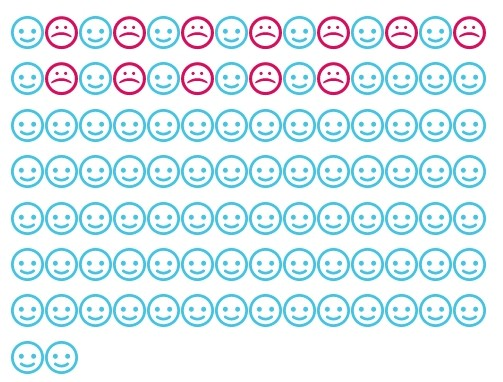

Why these breaching of order happens. Maybe below scattered plot will help us visualize data and understand what could be the reason.  

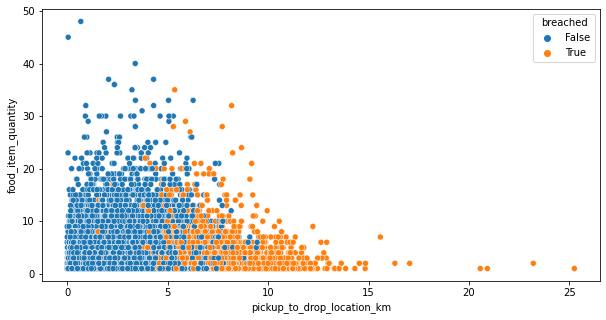

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=df_filt['pickup_to_drop_location_km'], y=df_filt['food_item_quantity'], hue=df_filt['breached'])

Above image shows that as the pickup_to_drop_location increases we can see the relation of breached orders. Data suggests :
- Seeing horizontal axis and orange dots. As rider has to travel farther distance there are more breached orders. Maybe, due to the traffic  or something. 
- Seeing vertical axis and orange dots. In some orders, as there are more food_item_quantity per order. That also caused order to breach. Maybe reason could be more time to prepare food.



In [21]:
df_filt.head()

food_order_id  food_restaurant_id  ...  breached food_item_quantity
0    29004366590             5401247  ...     False                  2
1    29005289677             5712146  ...     False                  2
2    29006049722             4878866  ...     False                  1
3    29014686971             4713140  ...     False                  1
4    29015440961             5276534  ...     False                  2

[5 rows x 12 columns]

In [23]:
#converting 'created_at' column from object type to datetime type
df_filt.created_at = df_filt.created_at.astype('datetime64[ns]')

## Hypothesis #2

In earlier hypothesis, we tried to batch order on the basis of their food delivery distance. In this hypothesis, We can only batch two orders when they are within specific timeframe tolerance. What does it mean? We can batch two orders if they are let's say 2-3 minute apart. 
> For this problem, i am defining time tolerance to be 3 minutes.

we are first ordering the dataset based on `create_at` column in ascending order. Such that, we first row will have earliest order in that day. Like:

```
 	      food_order_id pickup_to_drop_location_km created_at 	pickup_latitude pickup_longitude drop_latitude drop_longitude 	expected_delivery_time actual_delivery_time breached 	food_item_quantity
food_restaurant_id 											
1788405431 	56040745858 	3.231 	2020-02-01 00:00:26 	2.977610 	92.692927 	2.968241 	92.703975 	25.0 	24.374 	False 	1
1727732789 	55387543493 	2.032 	2020-02-01 00:01:07 	3.009800 	92.657740 	3.020678 	92.655913 	35.0 	28.538 	False 	2
1791993650 	50898423745 	4.782 	2020-02-01 00:01:25 	3.027288 	92.593590 	3.056409 	92.594437 	34.0 	29.148 	False 	1
1725307628 	45283500005 	0.746 	2020-02-01 00:01:32 	2.961937 	92.597971 	2.965700 	92.600089 	27.0 	18.704 	False 	2

```

If you see `created_at` column. Time is in ascending order. But `In what terms this should be helpful? ` 

We will see it in this section!

In [25]:
#sorting based on when the order was placed then only we can batch
df_filt= df_filt.sort_values(by="created_at") 

In [26]:
df_filt.set_index("food_restaurant_id", inplace = True)

Seeing what data looks like after the re-ordering. Notice the `created_at` column.

In [28]:
df_filt.head(15)

food_order_id  ...  food_item_quantity
food_restaurant_id                 ...                    
1788405431            56040745858  ...                   1
1727732789            55387543493  ...                   2
1791993650            50898423745  ...                   1
1725307628            45283500005  ...                   2
1748255192            36738924379  ...                   2
1723119989            59623284465  ...                   1
1757494370            61614049796  ...                   2
1770264293            50087187947  ...                   1
1769675045            55130831660  ...                   1
1782264920            43458499812  ...                   1
1769675045            42194503656  ...                   4
1741104515            62734342187  ...                   2
1734269945            59913708523  ...                   1
1734269945            57060992501  ...                   1
1732858484            56209732867  ...                   1

[15 rows x 11 columns]

### Hypothesis #2 (i)
> I hypothesize that, we should prioritize solving the breached orders. That is batching breached orders so that they don't get delayed. Such that, customer experience is pleasant.  

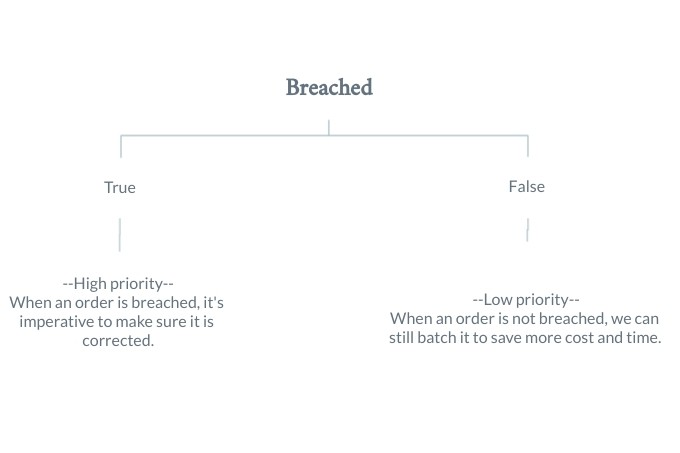

In [32]:
relevent_fields=['pickup_to_drop_location_km','created_at', 'expected_delivery_time',
                 'actual_delivery_time','breached']
df_filt[relevent_fields].head(10)

pickup_to_drop_location_km  ... breached
food_restaurant_id                              ...         
1788405431                               3.231  ...    False
1727732789                               2.032  ...    False
1791993650                               4.782  ...    False
1725307628                               0.746  ...    False
1748255192                               2.796  ...    False
1723119989                               1.605  ...     True
1757494370                               1.554  ...    False
1770264293                               3.410  ...    False
1769675045                               2.833  ...    False
1782264920                               2.393  ...    False

[10 rows x 5 columns]

Above table will show what order is breached or not and this time we have ascending order of order placed format. If we know, what order is breached and what's not:
- We can batch up breached order with unbreached order so that the average time of batched delivery is below expected delivery time.
- We can batch up unbreached order with another unbreached order. If that helps save time and cost.

Since we needed to find :
> ​Determine the share of successfully delivered orders that can be
batched for Bangalore ​










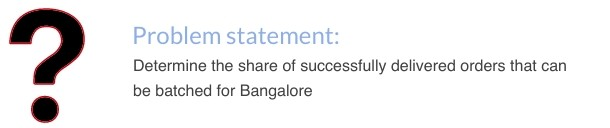

We know,

Total number of orders : 131592

Breached: 16724

Since, we have many unbreached orders. If we can batch breached orders. We need too make sure that while batching two orders must be having same time tolerance i.e they both together save time not overuse it. Seeing the data below there are frequent orders are being placed almost on every 20 seconds. 
```
 	      food_order_id pickup_to_drop_location_km created_at 	pickup_latitude pickup_longitude drop_latitude drop_longitude 	expected_delivery_time actual_delivery_time breached 	food_item_quantity
food_restaurant_id 											
1788405431 	56040745858 	3.231 	2020-02-01 00:00:26 	2.977610 	92.692927 	2.968241 	92.703975 	25.0 	24.374 	False 	1
1727732789 	55387543493 	2.032 	2020-02-01 00:01:07 	3.009800 	92.657740 	3.020678 	92.655913 	35.0 	28.538 	False 	2
1791993650 	50898423745 	4.782 	2020-02-01 00:01:25 	3.027288 	92.593590 	3.056409 	92.594437 	34.0 	29.148 	False 	1
1725307628 	45283500005 	0.746 	2020-02-01 00:01:32 	2.961937 	92.597971 	2.965700 	92.600089 	27.0 	18.704 	False 	2

```


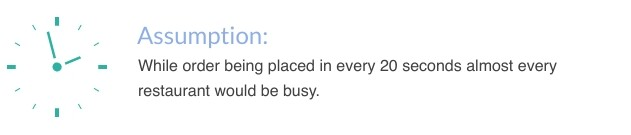

There is another thing we need to make sure that, if restaurant are not much far away from each other. Below, map plotting shows that there is flock of restaurant grouped quite dense - i have checked the distance randomly between 2 coordinates (one breached and one unbreached) turned out to be `0.0346`km. 


In [42]:
#calcuating distance between 2 random nearby restaurants
import geopy.distance

coords_1 = (2.932035 ,	92.63241)
coords_2 = (2.931803 ,	92.6322)

print(geopy.distance.distance(coords_1, coords_2).km)


0.034687046076393925


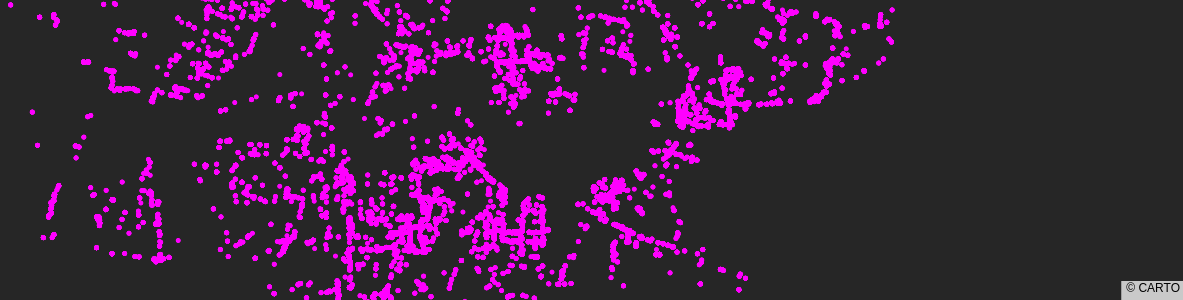

Below interactive map plot for restaurants latitude and longitude

In [ ]:
import plotly.express as px
#pickup_latitude 	time_diff 	pickup_longitude
fig = px.scatter_mapbox(df, lat="pickup_latitude", lon="pickup_longitude", hover_name="breached",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Above image you will see the restaurants are close with each other.  Generally, restaurants are built near the other restaurants to attract people and provide them choices. So, many restaurants will be within 1-2 km there will be many restaurant for rider to decide which delivery to batch. 
- Even though restaurant would be different. Orders will be frequent that rider can travel to retrieve batch order from another restaurant while being on the way.

> Note: Coordinates value provided are already altered in the dataset, maybe due to privacy concerns.

Let's see the distance of other restaurants from one restaurant within same time period they were order. (2-3minutes)

Sample restaurant coordinates: `2.961937, 92.597971`. In the same time tolerance (2-3min), these far `(in km)` are restaurant from our current restaurant coordinates. 
```
[12.66614672637317,
 13.154577576380957,
 5.915406224862305,
 0.0,
 0.15301023583368742,
 13.157821481077436,
 7.787440291836595,
 0.4350922083821356,
 8.344549170238675,
 0.4350922083821356,
 10.22361835280843,
 11.74409476426143,
 11.74409476426143,
 1.8433284169126494,
 0.901977302685563,
 13.52692956088554,
 11.038475742469494,
 0.15301023583368742,
 4.006921553513217,
 2.0373165748507516,
 8.034514620046314]
 ...
 ...
 ```
We can see there are many restaurants within less than 3km region and with same time when they were ordered. So this can be easily batched. 
Rider can chose nearby restaurants. What batch order to batch.

Our breached orders were 16,724, if we batch them up with unbreached orders. Then one part of answer would be: 

> So, the share of successfully delivered order will be (16724/131592) ~ 12%. 

In [74]:
#2.977610 	92.692927
import geopy.distance

#coords_1 = (2.977610,  92.692927)

l=[]
for i in range(len(df_rest.pickup_longitude.tolist())):
    coords_2 = (df_rest.pickup_latitude.tolist()[i+1] ,df_rest.pickup_longitude.tolist()[i+1])
    l.append((geopy.distance.distance((df_rest.pickup_latitude.tolist()[4] ,df_rest.pickup_longitude.tolist()[4]), coords_2).km))
    if i==20:
        break
l

[12.66614672637317,
 13.154577576380957,
 5.915406224862305,
 0.0,
 0.15301023583368742,
 13.157821481077436,
 7.787440291836595,
 0.4350922083821356,
 8.344549170238675,
 0.4350922083821356,
 10.22361835280843,
 11.74409476426143,
 11.74409476426143,
 1.8433284169126494,
 0.901977302685563,
 13.52692956088554,
 11.038475742469494,
 0.15301023583368742,
 4.006921553513217,
 2.0373165748507516,
 8.034514620046314]

Further, if we want we can also try batching remaining unbreached orders with unbreached orders. 

Assuming that within 2-3 minutes, there are 3-4 orders placed within nearby restuarant. Then, for remaining unbreached orders(98,000) would have atleast 8,000 orders that can be batched. 

In [34]:
## can groupby related to restaurant
df_rest= df_filt.reset_index()
df_rest.head()

food_restaurant_id  food_order_id  ...  food_item_quantity                start
0          1788405431    56040745858  ...                   1  2020-02-01 00:00:00
1          1727732789    55387543493  ...                   2  2020-02-01 00:00:00
2          1791993650    50898423745  ...                   1  2020-02-01 00:00:00
3          1725307628    45283500005  ...                   2  2020-02-01 00:00:00
4          1748255192    36738924379  ...                   2  2020-02-01 00:00:00

[5 rows x 14 columns]

In [51]:
df_rest.head(10)

food_restaurant_id  food_order_id  ...  food_item_quantity                start
0          1788405431    56040745858  ...                   1  2020-02-01 00:00:00
1          1727732789    55387543493  ...                   2  2020-02-01 00:00:00
2          1791993650    50898423745  ...                   1  2020-02-01 00:00:00
3          1725307628    45283500005  ...                   2  2020-02-01 00:00:00
4          1748255192    36738924379  ...                   2  2020-02-01 00:00:00
5          1723119989    59623284465  ...                   1  2020-02-01 00:00:00
6          1757494370    61614049796  ...                   2  2020-02-01 00:00:00
7          1770264293    50087187947  ...                   1  2020-02-01 00:00:00
8          1769675045    55130831660  ...                   1  2020-02-01 00:00:00
9          1782264920    43458499812  ...                   1  2020-02-01 00:00:00

[10 rows x 14 columns]